In [1]:
# Importing Dependencies
import matplotlib.pyplot as plt
import datetime
import pandas as pd

In [2]:
# Loading the CSV File
path = "data/Accidents.csv"
df_filtered = pd.read_csv(path)

In [3]:
# Loading the CSV File
path2 = "data/Licensed_Drivers_clean.csv"
df2 = pd.read_csv(path2)

In [4]:
# Converting the time columns to datetime format
df_filtered['Start_Time'] = pd.to_datetime(df_filtered['Start_Time'], format ='mixed')
df_filtered['End_Time'] = pd.to_datetime(df_filtered['End_Time'], format ='mixed')

In [5]:
# Creating new columns for Year, Month and Day Name
df_filtered.loc[:, 'Month'] = df_filtered['Start_Time'].dt.month
df_filtered.loc[:, 'Day_Name'] = df_filtered['Start_Time'].dt.day_name()
df_filtered.loc[:, 'Hour'] = df_filtered['Start_Time'].dt.hour

# TIME ANALYSIS

## Time of Day

In [6]:
# Filtering the dataset by the time of the Day
day_night_count = df_filtered["Sunrise_Sunset"].value_counts()
day_night_df = pd.DataFrame(day_night_count)
day_night_df = day_night_df.reset_index().rename(columns={"count": "Number of Accidents"})
day_night_df.iloc[0:2]

,Sunrise_Sunset,Number of Accidents
0,Day,53240
1,Night,23829


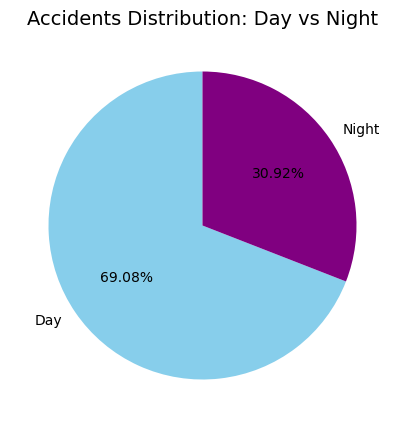

In [7]:
# Plotting the filtered data
colors = ['skyblue', 'purple']
ax = day_night_count.iloc[0:2].plot(
    kind='pie',figsize=(5, 5),colors=colors,autopct='%1.2f%%',startangle=90,textprops={'color': 'black'},legend=False)
plt.title('Accidents Distribution: Day vs Night', color='black', fontsize=14)
ax.set_ylabel('')
plt.savefig("static/images/day_night.png", bbox_inches='tight')
plt.show()

## Hourly

In [8]:
# Filtering the dataset by the time of the Day
hour_count = df_filtered["Hour"].value_counts()
hour_df = pd.DataFrame(hour_count)
hour_df = hour_df.reset_index()
hour_list = list(range(0,24))
hour_df['Hour'] = pd.Categorical(hour_df['Hour'], categories=hour_list, ordered=True)
hour_df = hour_df.sort_values('Hour')
hour_df = hour_df.rename(columns={"count": "Number of Accidents"})
hour_df

,Hour,Number of Accidents
20,0,1107
21,1,1011
22,2,958
23,3,850
17,4,1629
14,5,2256
7,6,4178
2,7,5745
0,8,5916
9,9,3702


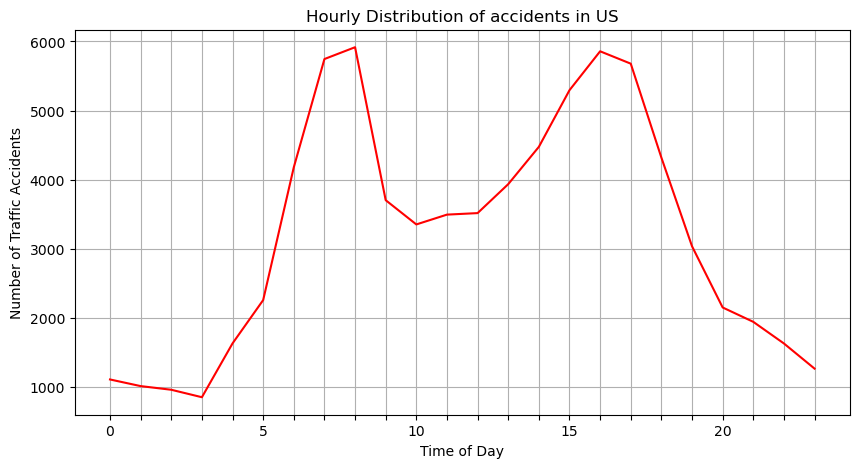

In [9]:
# Plotting the filtered data
hour_df.plot(x='Hour', y='Number of Accidents',figsize=(10,5),color='red',legend=False)
plt.xlabel("Time of Day")
plt.ylabel("Number of Traffic Accidents")
plt.title("Hourly Distribution of accidents in US")
plt.xticks(range(0,24),rotation=0)
plt.grid()
plt.savefig("static/images/hourly.png", bbox_inches='tight')
plt.show()

## Daily 

In [10]:
# Filtering the dataset by the Day of the Week
day_df = df_filtered.copy()
day_counts = day_df.groupby('Day_Name').size().reset_index(name='Count')

# Sort the results by day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts['Day_Name'] = pd.Categorical(day_counts['Day_Name'], categories=day_order, ordered=True)
day_counts = day_counts.sort_values('Day_Name')

day_counts.rename(columns={"Day_Name" : "Day of Week"})

,Day of Week,Count
1,Monday,12100
5,Tuesday,12901
6,Wednesday,13152
4,Thursday,13110
0,Friday,13597
2,Saturday,6789
3,Sunday,5634


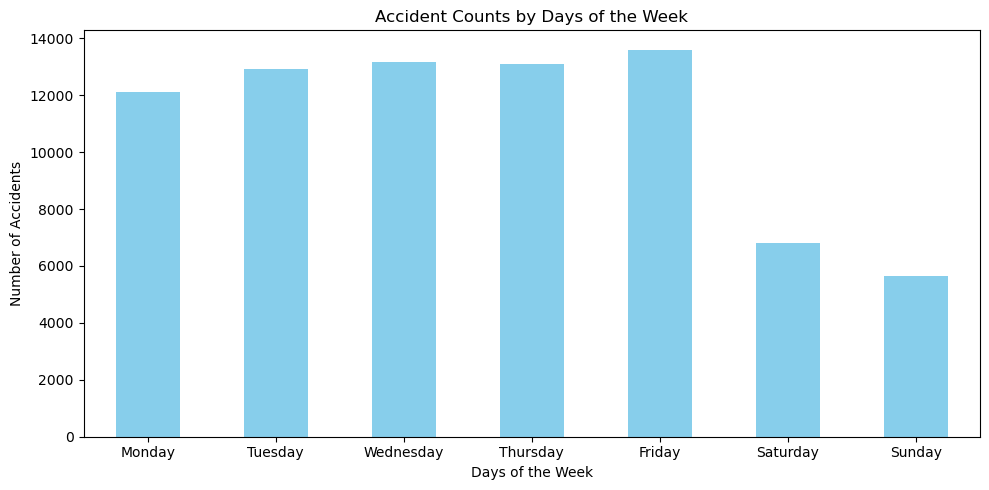

In [11]:
# Plotting the filtered data
day_counts.plot(x='Day_Name', y='Count', kind='bar', figsize=(10, 5), color='skyblue',legend=False)

plt.title('Accident Counts by Days of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("static/images/daily.png", bbox_inches='tight')
plt.show()

## Monthly

In [12]:
# Filtering the dataset by monthly number of Accidents
months_count = df_filtered.groupby('Month')["ID"].count()
months_df = pd.DataFrame(months_count)
months_df.reset_index().rename(columns={"ID": "Number of Accidents"})

,Month,Number of Accidents
0,1,7479
1,2,6553
2,3,5505
3,4,5828
4,5,5557
5,6,5684
6,7,5147
7,8,6043
8,9,6586
9,10,6747


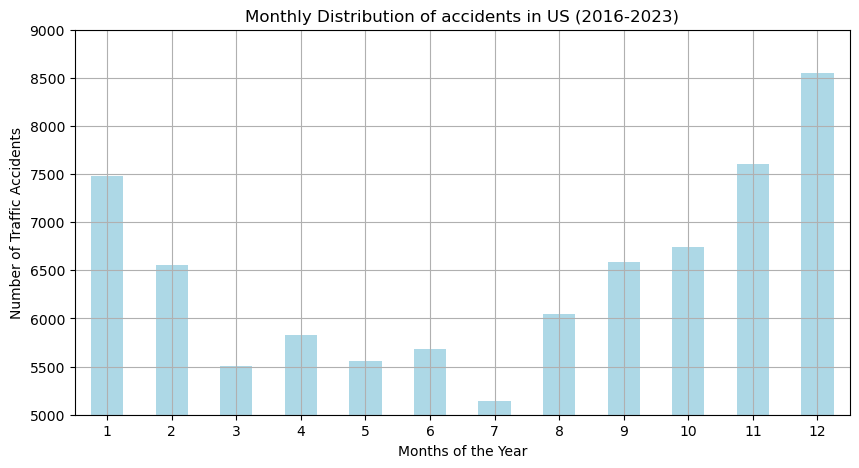

In [13]:
# Plotting the filtered data
months_count.plot(figsize=(10,5),kind='bar',color='lightblue')
plt.xlabel("Months of the Year")
plt.ylabel("Number of Traffic Accidents")
plt.title("Monthly Distribution of accidents in US (2016-2023)")
plt.xticks(rotation=0)
plt.ylim(5000,9000)
plt.savefig("static/images/monthly.png", bbox_inches='tight')
plt.grid()



## Yearly 

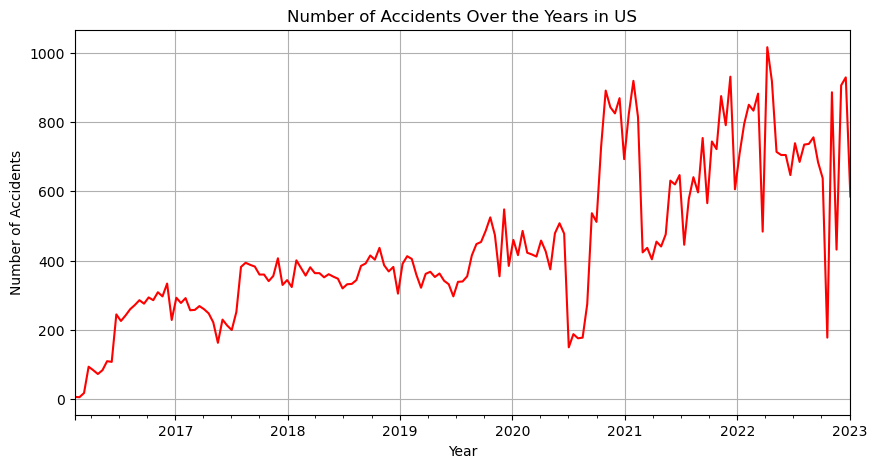

In [14]:
# Filtering the dataset with interval of "15 Days" and plotting Yearly number of Accidents
yearly_df = df_filtered.copy()
yearly_df = yearly_df.set_index('Start_Time')
yearly_df.resample('15D')["ID"].count().plot(
    color='red', 
 figsize=(10, 5),
    title="Number of Accidents Over the Years in US"
)
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid()
plt.xlim(pd.Timestamp('2016-02-09'), pd.Timestamp('2023-1-1'))
plt.savefig("static/images/yearly.png", bbox_inches='tight')
plt.show()

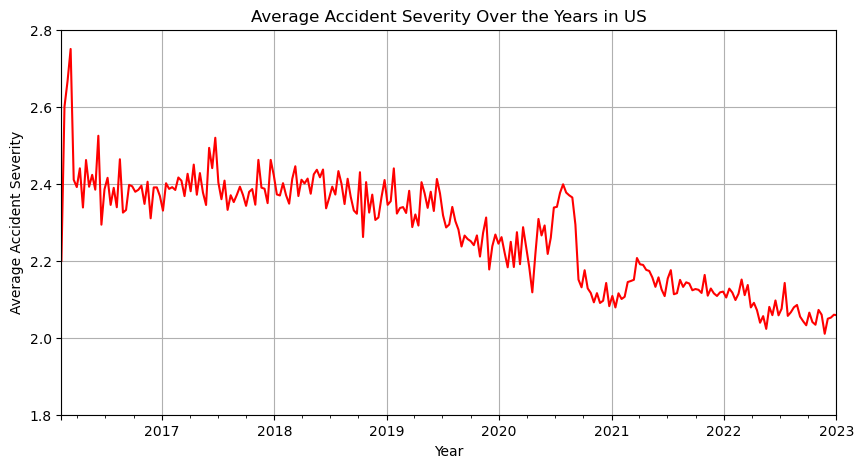

In [15]:
# Filtering the dataset with interval of "5 Days" and plotting Yearly average Severity
sev_yearly_df = df_filtered.copy()
sev_yearly_df = sev_yearly_df.set_index('Start_Time')
sev_yearly_df.resample('10D')["Severity"].mean().plot(
    color='red', 
 figsize=(10, 5),
    title="Average Accident Severity Over the Years in US"
)
plt.xlabel("Year")
plt.ylabel("Average Accident Severity")
plt.ylim(1.8,2.8)
plt.grid()
plt.xlim(pd.Timestamp('2016-02-09'), pd.Timestamp('2023-1-1'))
plt.savefig("static/images/yearly_severity.png", bbox_inches='tight')
plt.show()

# WEATHER AND ENVIRONMENT

## Weather Condition 

**Weather Conditions contain too many variables, in order to obtain precise results we gathered them into 4 main categories**

In [16]:
# Filtering the dataset by Weather Conditions
windy_conditions = df_filtered[df_filtered['Weather_Condition'].str.contains(
    'Wind|Thunderstorm|Blowing|T-Storm|Funnel Cloud|Squalls|Sand|Dust', na=False)]
rainy_conditions = df_filtered[df_filtered['Weather_Condition'].str.contains(
    'Rain|Wintry|Hail|Drizzle|Ice Pellets|Sleet', na=False)]
foggy_conditions = df_filtered[df_filtered['Weather_Condition'].str.contains(
    'Fog|Mist|Haze', na=False)]
snow_conditions = df_filtered[df_filtered['Weather_Condition'].str.contains(
    'Snow|Wintry', na=False)]
all_conditions = df_filtered[df_filtered['Weather_Condition'].str.contains(
    'Wind|Thunderstorm|Blowing|T-Storm|Funnel Cloud|Squalls|Sand|Dust|Rain|Wintry|Hail|Drizzle|Ice Pellets|Sleet|Fog|Mist|Haze|Snow|Wintry', na=False)]

In [17]:
# Finding the percentage of effect on Accidents
windy_perc = (windy_conditions["ID"].count() / df_filtered["ID"].count())* 100
rainy_perc = (rainy_conditions["ID"].count() / df_filtered["ID"].count())* 100
foggy_perc = (foggy_conditions["ID"].count() / df_filtered["ID"].count())* 100
snow_perc = (snow_conditions["ID"].count() / df_filtered["ID"].count())* 100
all_perc = (all_conditions["ID"].count() / df_filtered["ID"].count())* 100

In [18]:
# Creating a new DataFrame for Weather Condition effects on Accidents
weather_list = [{"Weather" : "Windy", "Effect on Accidents(%)" : windy_perc}, 
              {"Weather" : "Rain", "Effect on Accidents(%)" : rainy_perc},
              {"Weather" : "Foggy", "Effect on Accidents(%)" : foggy_perc},
              {"Weather" : "Snow", "Effect on Accidents(%)" : snow_perc},
             ]
weather_df = pd.DataFrame(weather_list)
weather_df = weather_df.sort_values(by="Effect on Accidents(%)",ascending=False)
weather_df

,Weather,Effect on Accidents(%)
1,Rain,7.141286
2,Foggy,2.511548
3,Snow,2.210059
0,Windy,1.887867


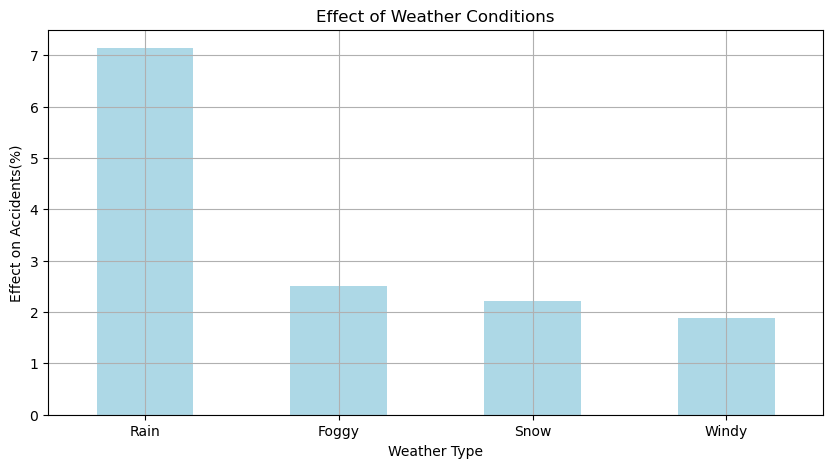

In [19]:
# Plotting the data
weather_df.plot(figsize=(10,5),kind='bar',legend=False,color='lightblue')
plt.xticks(ticks=range(len(weather_df)), labels=weather_df["Weather"], rotation=0)
plt.xlabel("Weather Type")
plt.ylabel("Effect on Accidents(%)")
plt.title("Effect of Weather Conditions")
plt.savefig("static/images/weather_condition.png", bbox_inches='tight')
plt.grid()

In [20]:
# Finding the Severity of Accidents for Weather Conditions
sev_windy = windy_conditions["Severity"].mean()
sev_rainy = rainy_conditions["Severity"].mean()
sev_foggy = foggy_conditions["Severity"].mean()
sev_snow = snow_conditions["Severity"].mean()

In [21]:
# Creating a new DataFrame for Weather Condition effects on Accident Severity
weather_sev_list = [{"Weather" : "Windy", "Average Severity" : sev_windy}, 
              {"Weather" : "Rain", "Average Severity" : sev_rainy},
              {"Weather" : "Foggy", "Average Severity" : sev_foggy},
              {"Weather" : "Snow", "Average Severity" : sev_snow},
             ]
weather_sev_df = pd.DataFrame(weather_sev_list)
weather_sev_df = weather_sev_df.sort_values(by="Average Severity",ascending=False)
weather_sev_df

,Weather,Average Severity
1,Rain,2.250226
3,Snow,2.219555
0,Windy,2.191912
2,Foggy,2.168985


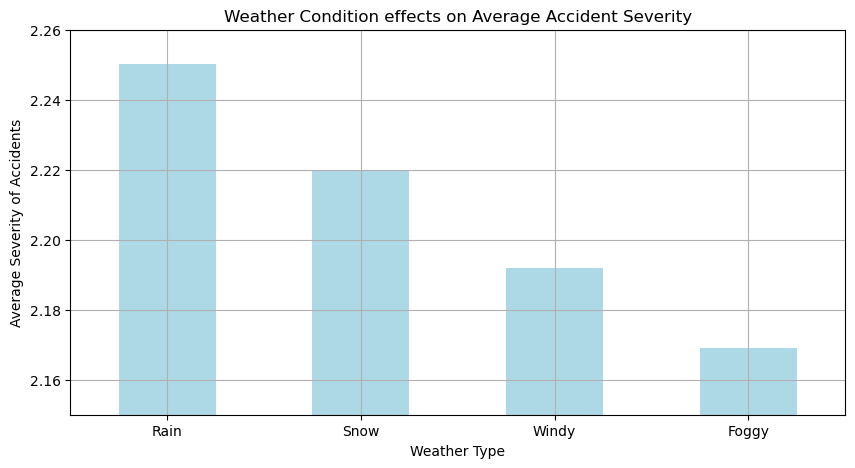

In [22]:
# Plotting the data
weather_sev_df.plot(figsize=(10,5),kind='bar',legend=False,color='lightblue')
plt.xticks(ticks=range(len(weather_sev_df)), labels=weather_sev_df["Weather"], rotation=0)
plt.xlabel("Weather Type")
plt.ylabel("Average Severity of Accidents")
plt.title("Weather Condition effects on Average Accident Severity")
plt.ylim(2.15,2.26)
plt.savefig("static/images/weather_severity.png", bbox_inches='tight')
plt.grid()

## Humidity 

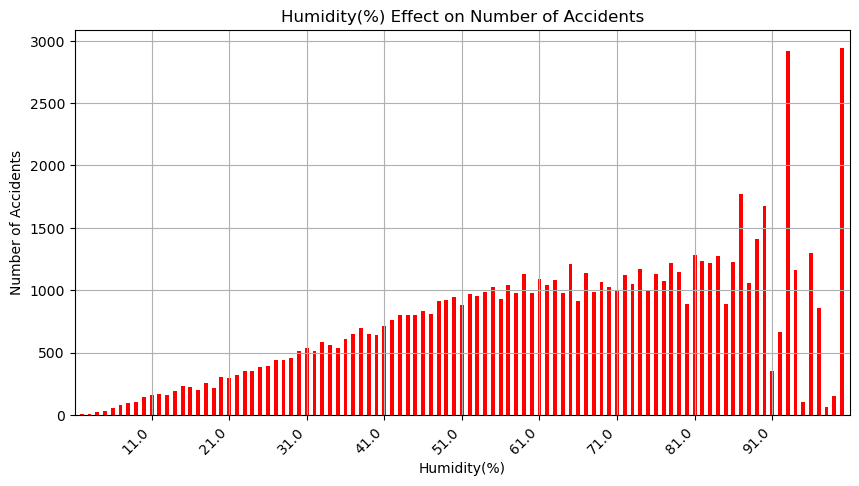

In [23]:
# Filtering the data by humidity and plotting
list_hum = df_filtered.groupby("Humidity(%)")["ID"].count()
list_hum.plot(kind='bar',figsize=(10,5),color='red')
plt.xticks(rotation=45, ha='right')
plt.locator_params(axis='x', nbins=10)
plt.xlabel("Humidity(%)")
plt.ylabel("Number of Accidents")
plt.title("Humidity(%) Effect on Number of Accidents")
plt.xlim(0.1,100)
plt.grid()
plt.savefig("static/images/humidity.png", bbox_inches='tight')
plt.show()

**After Inspecting some columns in the dataset, we found that the columns <span style="color: blue;">[Temperature(F), Wind_Chill(F), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in)]</span> are effecting the number of accidents mostly on Fair/Normal Weather Conditions when more people go out to drive compared to bad weather conditions when there is less people in the traffic.**

## Temperature 

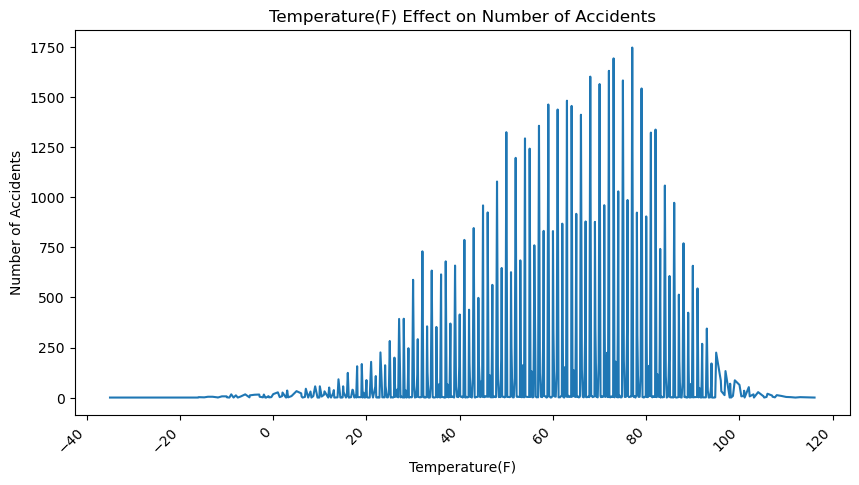

In [24]:
# Filtering the data by Temperature and plotting
list_temp = df_filtered.groupby("Temperature(F)")["ID"].count()
list_temp.loc[0] = round((list_temp.loc[-1] + list_temp.loc[1])/2)
list_temp.plot(figsize=(10,5))
plt.xticks(rotation=45, ha='right')
plt.locator_params(axis='x', nbins=11)
plt.xlabel("Temperature(F)")
plt.ylabel("Number of Accidents")
plt.title("Temperature(F) Effect on Number of Accidents")
plt.savefig("static/images/temperature.png", bbox_inches='tight')
plt.show()

## Visibility 

In [25]:
# Filtering the dataset on Visibility with special parameters for better visualization.
less_1 = df_filtered[df_filtered["Visibility(mi)"] <= 1]["ID"].count()
btw_1_5 = df_filtered[(df_filtered["Visibility(mi)"] >1) & (df_filtered["Visibility(mi)"] < 10)]["ID"].count()
eq_10 = df_filtered[df_filtered["Visibility(mi)"] == 10]["ID"].count()
more_10 = df_filtered[df_filtered["Visibility(mi)"] > 10]["ID"].count()

In [26]:
# Creating a new DataFrame 
vis_data = [{"Visibility" : "Less than 1", "Number of Accidents" : less_1} , 
        {"Visibility" : "Between 1 and 10", "Number of Accidents" : btw_1_5} , 
        {"Visibility" : "Equal to 10", "Number of Accidents" : eq_10} , 
        {"Visibility" : "More than 10", "Number of Accidents" : more_10}]

visibility_df = pd.DataFrame(vis_data)
visibility_df
            

,Visibility,Number of Accidents
0,Less than 1,3952
1,Between 1 and 10,12166
2,Equal to 10,60874
3,More than 10,291


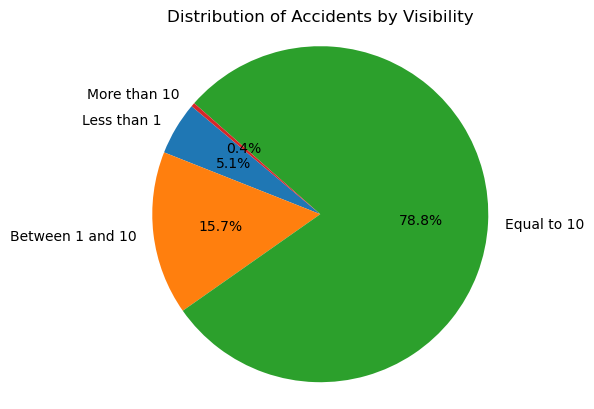

In [27]:
# Plotting the data
plt.pie(visibility_df["Number of Accidents"], labels=visibility_df["Visibility"], autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Accidents by Visibility")
plt.axis("equal")
plt.savefig("static/images/visibility.png", bbox_inches='tight')
plt.show()

## Traffic Infrastructures

In [28]:
# Filtering and finding the percentages of Traffic Infrastructures
infrastructure_df = pd.DataFrame(columns=["Type","Effect on Accidents"])

infras_list = ["Amenity","Bump","Crossing","Give_Way","Junction",
              "No_Exit","Railway","Roundabout","Station","Stop",
             "Traffic_Calming","Traffic_Signal","Turning_Loop",]

s=0
for x in infras_list:
    perc = (df_filtered.groupby(x)["ID"].count().iloc[0]/df_filtered["ID"].count())*100
    infrastructure_df.loc[s] = [x,perc]
    s +=1

infrastructure_df = infrastructure_df.sort_values(by='Effect on Accidents', ascending=False)
infrastructure_df["Type"] = infrastructure_df["Type"].str.replace("_" , " ")
infrastructure_df

,Type,Effect on Accidents
12,Turning Loop,100.000000
7,Roundabout,99.996118
1,Bump,99.944360
10,Traffic Calming,99.896484
5,No Exit,99.755444
3,Give Way,99.496655
6,Railway,99.056714
0,Amenity,98.712524
8,Station,97.348705
9,Stop,97.193432


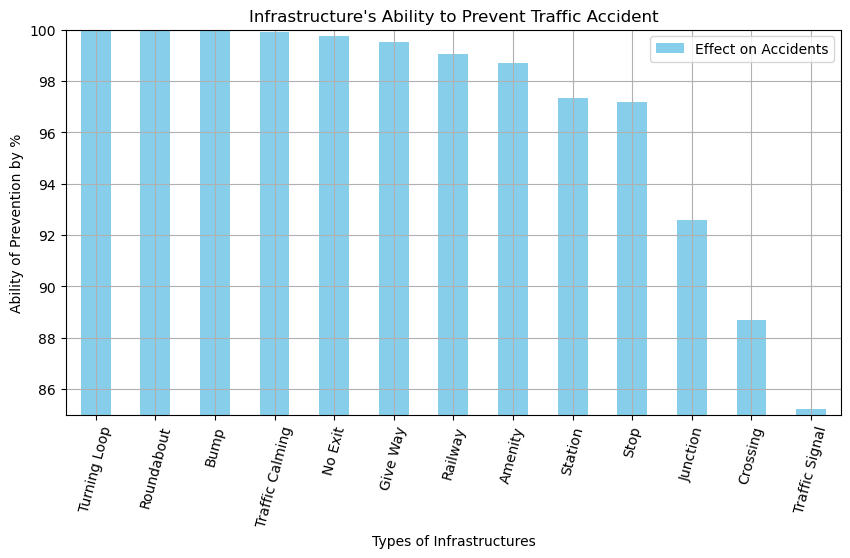

In [29]:
# Plotting the data
infrastructure_df.sort_values(by='Effect on Accidents', ascending=False).plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.xticks(ticks=range(len(infrastructure_df)), labels=infrastructure_df['Type'], rotation=75)
plt.xlabel('Types of Infrastructures')
plt.ylabel('Ability of Prevention by %')
plt.title("Infrastructure's Ability to Prevent Traffic Accident")
plt.ylim(85,100)
plt.grid()
plt.savefig("static/images/infrastructure.png", bbox_inches='tight')
plt.show()

# LOCATION

## State

In [30]:
# Filtering the data by State Per Capita and Plotting the data
df_state = df_filtered.groupby("State")
state_data = df_state["State"].value_counts().sort_values(ascending=False)
state_df = pd.DataFrame(state_data)
state_df = state_df.reset_index()
merged_df = pd.merge(state_df,df2, on='State', how='inner')
merged_df["Per Capita"] = merged_df["count"] / merged_df["Drivers"]
merged_df = merged_df[['State','Per Capita']].sort_values(by="Per Capita",ascending=False)
merged_df

,State,Per Capita
3,SC,0.000994
0,CA,0.000646
9,OR,0.000609
8,MN,0.000572
1,FL,0.000570
16,MD,0.000500
7,VA,0.000490
20,UT,0.000481
5,NC,0.000461
15,LA,0.000450


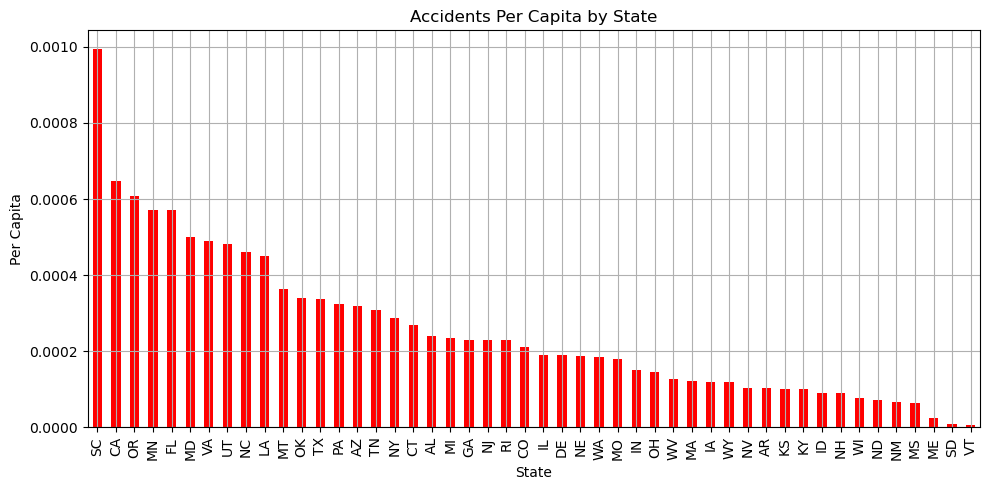

In [31]:
# Plotting the data
ax = merged_df.plot(kind='bar', x='State', y='Per Capita', legend=False, color='red', figsize=(10, 5))
plt.xlabel("State")
plt.ylabel("Per Capita")
plt.title("Accidents Per Capita by State")
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.savefig("static/images/state_percapita.png", bbox_inches='tight')
plt.show()

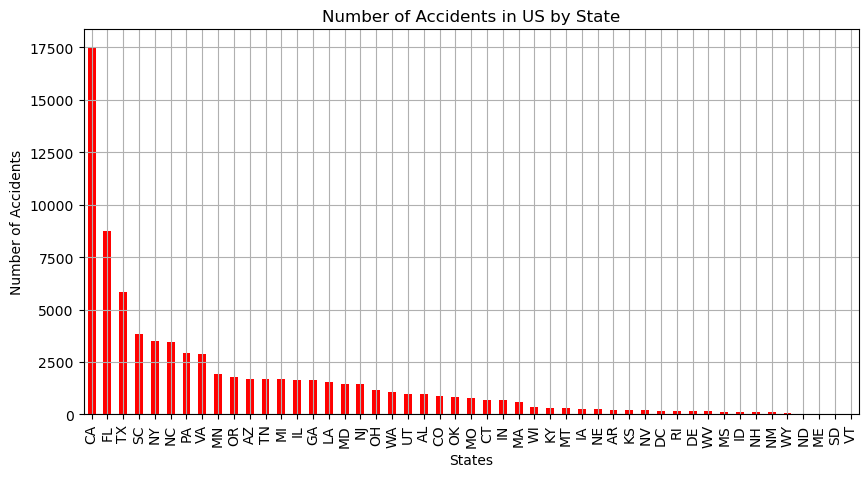

In [32]:
# Filtering the data by State and Plotting the data
df_state = df_filtered.groupby("State")
df_state["State"].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(10, 5), color = 'red')
plt.title("Number of Accidents in US by State")
plt.xlabel("States")
plt.ylabel("Number of Accidents")
plt.grid()
plt.savefig("static/images/state.png", bbox_inches='tight')
plt.show()

## City

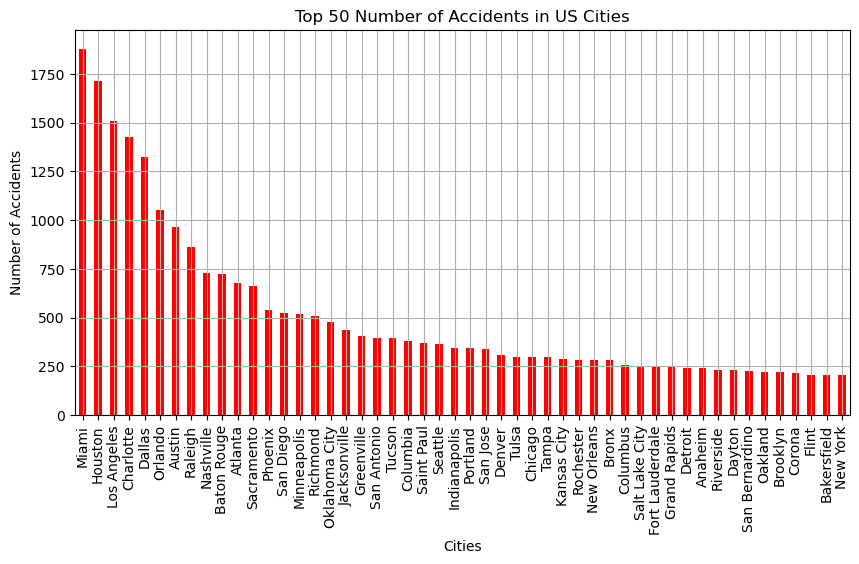

In [33]:
# Filtering the data by City and Plotting the data for top 50
city_df = df_filtered.groupby("City").count()
city_df.sort_values(by="ID", ascending=False, inplace=True)
city_df.iloc[0:50]["ID"].plot(figsize=(10, 5), kind='bar',color='red')
plt.title("Top 50 Number of Accidents in US Cities")
plt.xlabel("Cities")
plt.ylabel("Number of Accidents")
plt.grid()
plt.savefig("static/images/city.png", bbox_inches='tight')
plt.show()

In [34]:
# import hvplot.pandas

# map_plot = df_filtered.hvplot.points(
#     'Start_Lng',
#     'Start_Lat',
#     geo=True,
#     tiles='OSM',  
#     frame_width=800,
#     frame_height=600,
#     size=1,
#     color='State'
# )

# map_plot